In [1]:
# from PIL import ImageEnhance
# from PIL import Image
from PIL import ImageEnhance
import PIL
import skimage, skimage.io

In [2]:
import data, config, image
dataset = data.init_dataset()

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [3]:
# Import train+test data
img_dir = config.dataset_dir + 'train/'
img_name = img_dir + dataset.train[0]

## Image transformation

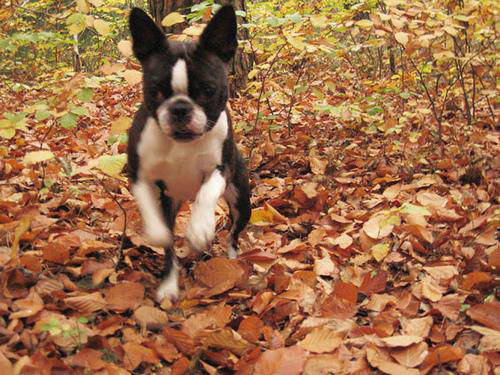

In [47]:
img = PIL.Image.open(img_name) # fill in directory
img2 = image.transform_image(img, sharpness=1, contrast=1, brightness=1)
#end_img.save('') # fill in directory
#     end_img.show()
img2

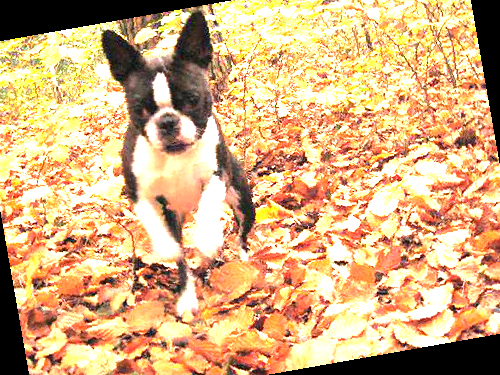

In [33]:
img2.rotate(10)

In [6]:
# convert PIL.Image to np.array
import numpy as np
a = np.array(img2.convert('RGB'))
a[0:2,0:2,:]

array([[[198,   0,   0],
        [255, 126,   0]],

       [[255, 130,   0],
        [255, 255,  72]]], dtype=uint8)

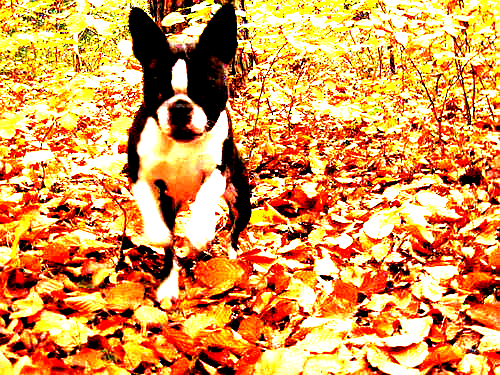

In [7]:
img_ = PIL.Image.fromarray(a)
img_

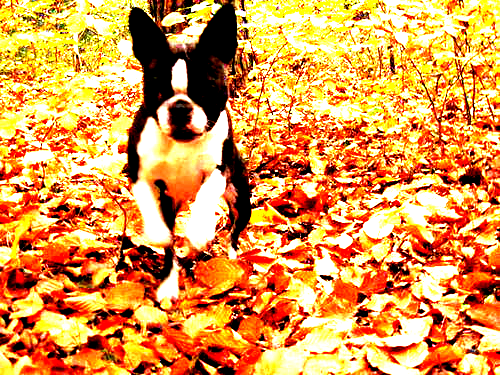

In [8]:
image.transform_image(img, contrast=2, sharpness=1, brightness=2)

In [9]:
img = image.transform_random(img)

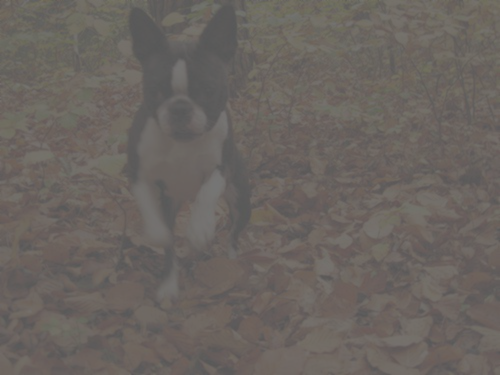

In [10]:
img

## Edge detection

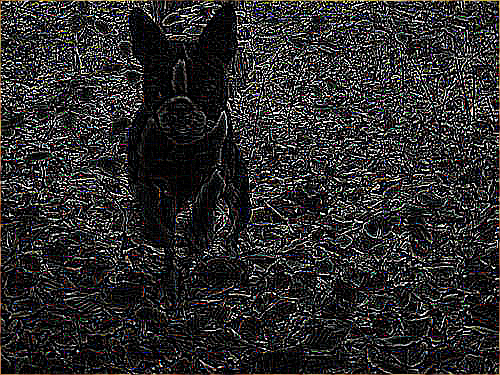

In [11]:
from PIL import Image, ImageFilter
import skimage.io

img = Image.open(img_name)
img = img.filter(ImageFilter.FIND_EDGES)
# skimage.io.imshow(image)
img

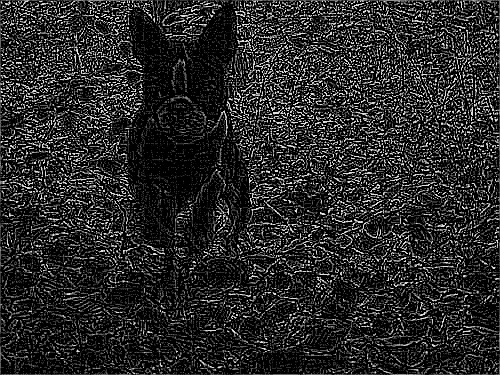

In [12]:
p = np.array(img.convert('P'))
PIL.Image.fromarray(p)

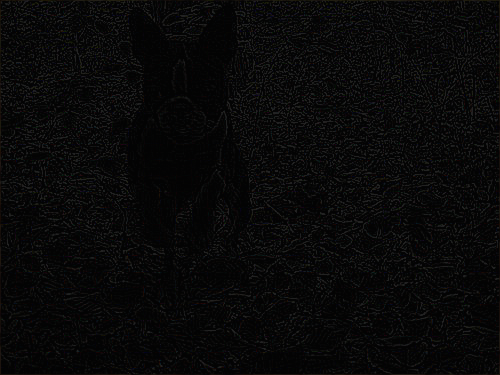

In [13]:
p_ = image.transform_random(img)
p_ = image.transform_random(img)
p_

In [14]:
p.shape

(375, 500)

In [15]:
i = np.array(Image.open(img_name).convert('RGB'))
i.shape

(375, 500, 3)

In [16]:
# np.column_stack((i,[p]))
p_ = p[:,:,np.newaxis]
super_img = np.append(i,p_,axis=2)
original = super_img[:,:,:3]
original.shape

(375, 500, 3)

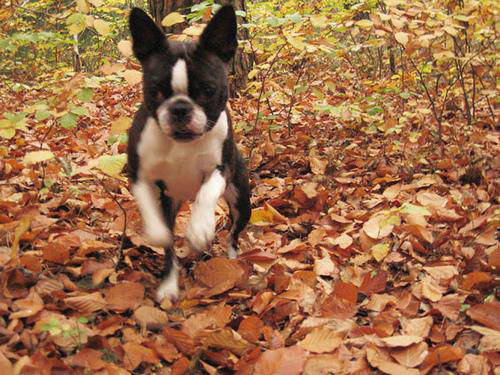

In [17]:
img = PIL.Image.fromarray(original)
img

## To Super img
Super img = img with as pixel values a vector [r,g,b,edge_value]

In [48]:
encoded = image.encode_super_img(img, mutate=True)
decoded = image.decode_super_img(encoded)
img = image.to_PIL_Image(decoded)
img

TypeError: encode_super_img() got an unexpected keyword argument 'mutate'